In [1]:
from libs.TicTacToe import TicTacToe
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model("saved_model/alpha_zero_model")

In [3]:
n_games = 100

# Random X vs random O

In [4]:
winners_random = []

for n in range(n_games):
    
    ttt = TicTacToe()

    while ttt.status=="Ongoing":

        valid_moves = ttt.next_moves()
        new_board = random.choice(valid_moves)
        ttt.play(new_board)
        #print(np.reshape(ttt.board, (3,3)),"\n")
        if len(valid_moves)==0:
            break

    winners_random.append(ttt.winner)

# AI plays X vs random O

In [5]:
ttt = TicTacToe()

while ttt.status=="Ongoing":

    player = ttt.next_player()

    # AI plays X 
    if player == 1:
        new_board = ttt.board.copy()
        state = ttt.get_board_from_player(1)
        probs, value = model.predict(state[np.newaxis,:])
        #print(probs, value)
        action = np.argmax(probs.flatten())
        new_board[action] = 1
        #ttt.next_state(ttt.board, player=1, action=action)

    # random plays O
    elif player == -1:
        valid_moves = ttt.next_moves()
        new_board = random.choice(valid_moves)

    # play
    ttt.play(new_board)

    ttt.check_if_winner(player)
    print(np.reshape(ttt.board, (3,3)),"\n")
    valid_moves = ttt.next_moves()
    if ttt.status!="Ongoing":
        break

print("[Winner]:",ttt.winner)

[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[ 0.  1.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]] 

[[ 0.  1.  0.]
 [ 0.  1. -1.]
 [ 0.  0.  0.]] 

[[ 0.  1.  0.]
 [ 0.  1. -1.]
 [-1.  0.  0.]] 

[[ 0.  1.  0.]
 [ 0.  1. -1.]
 [-1.  1.  0.]] 

[Winner]: 1


In [6]:
winners_AI_X = []

for n in range(n_games):

    ttt = TicTacToe()

    while ttt.status=="Ongoing":

        player = ttt.next_player()

        # AI plays X 
        if player == 1:
            new_board = ttt.board.copy()
            state = ttt.get_board_from_player(1)
            probs, value = model.predict(state[np.newaxis,:])
            #print(probs, value)
            action = np.argmax(probs.flatten())
            new_board[action] = 1
            #ttt.next_state(ttt.board, player=1, action=action)
        
        # random plays O
        elif player == -1:
            valid_moves = ttt.next_moves()
            new_board = random.choice(valid_moves)
        
        # play
        ttt.play(new_board)

        ttt.check_if_winner(player)
        #print(np.reshape(ttt.board, (3,3)),"\n")
        valid_moves = ttt.next_moves()
        if ttt.status!="Ongoing":
            break

    #print("[Winner]:",ttt.winner)
    winners_AI_X.append(ttt.winner)

# AI plays O vs random X

In [7]:
winners_AI_O = []

for n in range(n_games):

    ttt = TicTacToe()

    while ttt.status=="Ongoing":

        player = ttt.next_player()

        # AI plays X 
        if player == -1:
            new_board = ttt.board.copy()
            state = ttt.get_board_from_player(-1)
            probs, value = model.predict(state[np.newaxis,:])
            #print(probs, value)
            action = np.argmax(probs.flatten())
            new_board[action] = -1
            #ttt.next_state(ttt.board, player=1, action=action)
        
        # random plays O
        elif player == 1:
            valid_moves = ttt.next_moves()
            new_board = random.choice(valid_moves)
        
        # play
        ttt.play(new_board)

        ttt.check_if_winner(player)
        #print(np.reshape(ttt.board, (3,3)),"\n")
        valid_moves = ttt.next_moves()
        if ttt.status!="Ongoing":
            break

    #print("[Winner]:",ttt.winner)
    winners_AI_O.append(ttt.winner)

# AI vs AI

In [8]:
winners_AI_AI = []

for n in range(n_games):

    ttt = TicTacToe()

    while ttt.status=="Ongoing":

        player = ttt.next_player()

        # AI plays X 
        if player == 1:
            new_board = ttt.board.copy()
            state = ttt.get_board_from_player(1)
            probs, value = model.predict(state[np.newaxis,:])
            #print(probs, value)
            action = np.argmax(probs.flatten())
            new_board[action] = 1
            #ttt.next_state(ttt.board, player=1, action=action)
        
        # random plays O
        elif player == -1:
            new_board = ttt.board.copy()
            state = ttt.get_board_from_player(-1)
            probs, value = model.predict(state[np.newaxis,:])
            #print(probs, value)
            action = np.argmax(probs.flatten())
            new_board[action] = -1
            #ttt.next_state(ttt.board, player=1, action=action)
        
        # play
        ttt.play(new_board)

        ttt.check_if_winner(player)
        #print(np.reshape(ttt.board, (3,3)),"\n")
        valid_moves = ttt.next_moves()
        if ttt.status!="Ongoing":
            break

    #print("[Winner]:",ttt.winner)
    winners_AI_AI.append(ttt.winner)

# Final statistics

In [9]:
outcomes = {'O':-1,'draw':0,'X':1}

In [10]:
df_AI_AI = pd.DataFrame( [(name, winners_AI_AI.count(outcome)) for name,outcome in outcomes.items()], columns=['winner','AI_AI']).set_index('winner')
df_AI_X = pd.DataFrame( [(name, winners_AI_X.count(outcome)) for name,outcome in outcomes.items()], columns=['winner','AI_X']).set_index('winner')
df_AI_O = pd.DataFrame( [(name, winners_AI_O.count(outcome)) for name,outcome in outcomes.items()], columns=['winner','AI_O']).set_index('winner')
df_random = pd.DataFrame( [(name, winners_random.count(outcome)) for name,outcome in outcomes.items()], columns=['winner','random']).set_index('winner')

In [11]:
df_stats = pd.concat([df_random, df_AI_X, df_AI_O, df_AI_AI], axis=1)

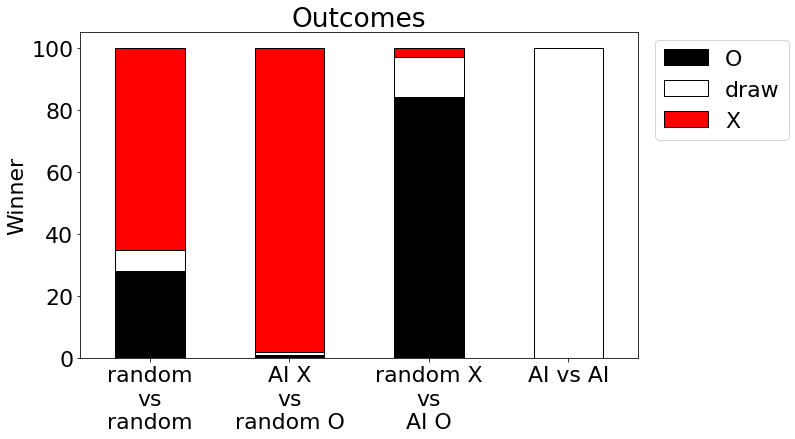

In [12]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(10,6))
ax = df_stats.T.plot.bar(stacked=True, ax=ax, color=['black','white','red'], edgecolor = 'black')
ax.set(title="Outcomes",ylabel='Winner',xticklabels=['random\nvs\nrandom', 'AI X\nvs\nrandom O','random X\nvs\nAI O', 'AI vs AI']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.legend(bbox_to_anchor=(1.01, 1.01))
plt.savefig('AlphaZero_results.svg')